In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


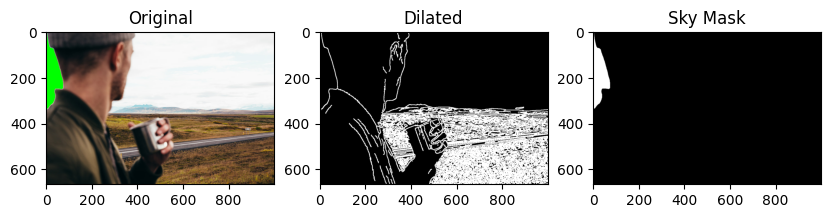

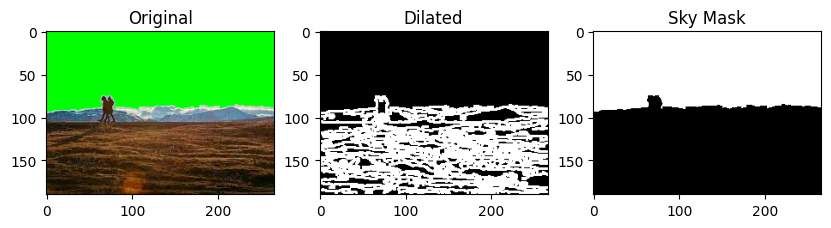

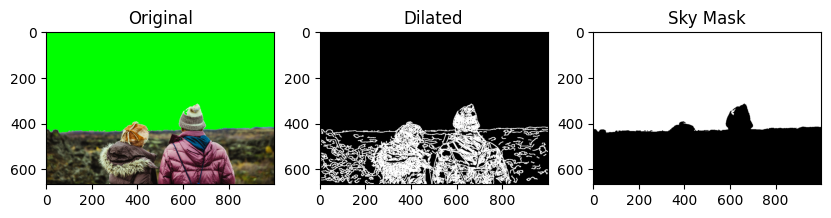

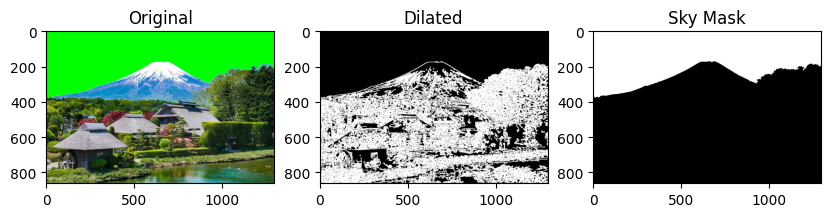

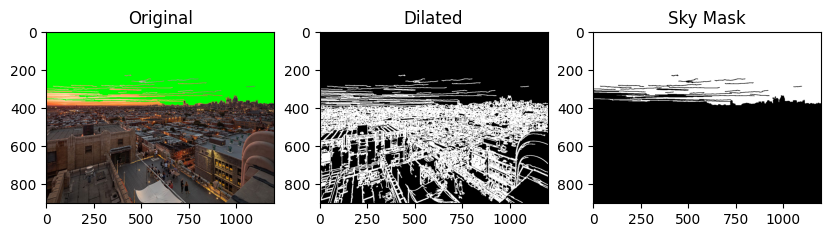

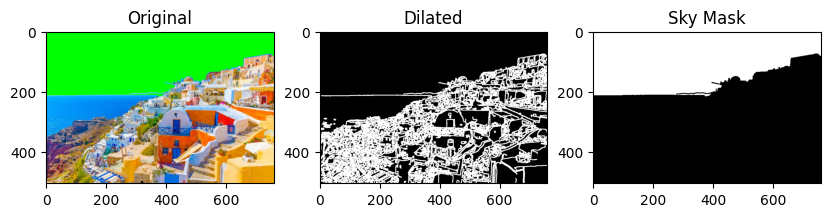

In [ ]:
def convert_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(img_gray, kernel_size=(3, 3)):
    return cv2.GaussianBlur(img_gray, kernel_size, 0)

def edge_detection(img_blurred, low_threshold, high_threshold):
    return cv2.Canny(img_blurred, low_threshold, high_threshold)

def morphological_dilate(edges, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.dilate(edges, kernel, iterations=iterations)

def morphological_eroded(edges, kernel_size=(3, 3), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(edges, kernel, iterations=iterations)

def auto_find_seed_point(image):
    '''using histogram  to finds the max appeared intensity
    in the upper part of the image. This will be the sky intensity value'''
    top_half = image[:int(image.shape[0] * 0.5), :]

    histogram = cv2.calcHist([top_half], [0], None, [256], [0, 256])

    max_intensity = np.argmax(histogram)
    # Find the max_appeared intensity value of the top half of the image
    rows, cols = np.where(top_half == max_intensity)
    if len(rows) > 0 and len(cols) > 0:
        return (rows[0], cols[0])
    else:
        return None

def region_growing(img, seed, region_threshold):
    # Parameters for region growing, up, down, left, right
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    segmented_img = np.zeros_like(img, dtype=np.uint8)  # To hold the segmented region
    stack = [seed]  # Stack for pixel traversal

    # Seed intensity
    seed_intensity = int(img[seed[0], seed[1]])

    # Loop until the stack is exhausted
    while stack:
        px, py = stack.pop()

        for dx, dy in neighbors:
            nx, ny = px + dx, py + dy

            if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                # Pixel difference
                diff = abs(int(img[nx, ny]) - seed_intensity)

                if diff < region_threshold and segmented_img[nx, ny] == 0:
                    segmented_img[nx, ny] = 255
                    stack.append((nx, ny))

    return segmented_img



def display_images(original, dilated, sky_mask):
    #Displays the original image, dilated image, and sky mask
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(dilated, cmap='gray')
    plt.title('Dilated')

    plt.subplot(1, 3, 3)
    plt.imshow(sky_mask, cmap='gray')
    plt.title('Sky Mask')

    plt.show()

def process_image(img_path):
    region_threshold = 50
    img = cv2.imread(img_path)

    assert img is not None, f"File '{img_path}' could not be read. Check if the file exists."

    img_gray = convert_to_gray(img)
    blurred_image = apply_gaussian_blur(img_gray, kernel_size=(5, 5))

    edges = edge_detection(blurred_image,20, 65)

    dilated_image = morphological_dilate(edges)

    # Find the seed point for region growing
    seed_point = auto_find_seed_point(dilated_image)

    assert seed_point is not None, f"Failed to find seed point for image: {img_path}"

    # Apply region growing with a higher region threshold
    sky_mask = region_growing(dilated_image, seed_point, region_threshold)

    # Color the sky area in green
    img[sky_mask != 0] = [0, 255, 0]

    # Display the images
    display_images(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), dilated_image, sky_mask)

def main():
    folder_path = '/content/drive/MyDrive/Colab Notebooks'
    imgs = os.listdir(folder_path)

    for filename in imgs:
        img_path = os.path.join(folder_path, filename)
        process_image(img_path)

main()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://981409f34ee40c2a3e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
